<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/Homework4.5/Lab_FitLineToGRBAfterGlow_mcmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


#Data:
Light curves of astrophysical objects,
GRBs -> powerful explosions, high energy photons, we are interested in optical after glow and how it evolves in time.

In [47]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [48]:
grbAG.tail()
#   W1 and M2 are uv based satellite filter
# U and V are ground based filters
# mag here is log 10(no. of photons)
# how to treat the upperlimit to get uncertainty of magerr

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


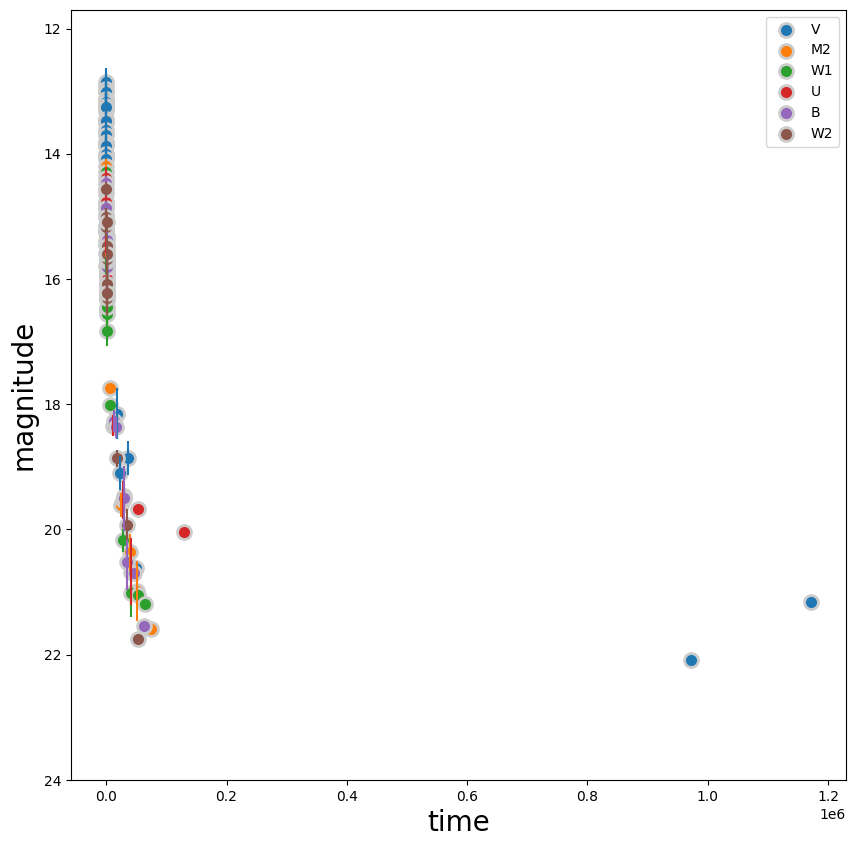

In [49]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("time", fontsize=20);

Figure no.1:
after glow of GRBs as they evolve overtime. This plot shows magnitude vs time for different filters , satellite , ground based.

# Create the log-time variable

We will fit a line in log space. That corresponds to fitting a powerlaw y=x^a in natural space.


In [50]:
import numpy as np
grbAG['logtime']= np.log10(grbAG['time'])

In [51]:
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


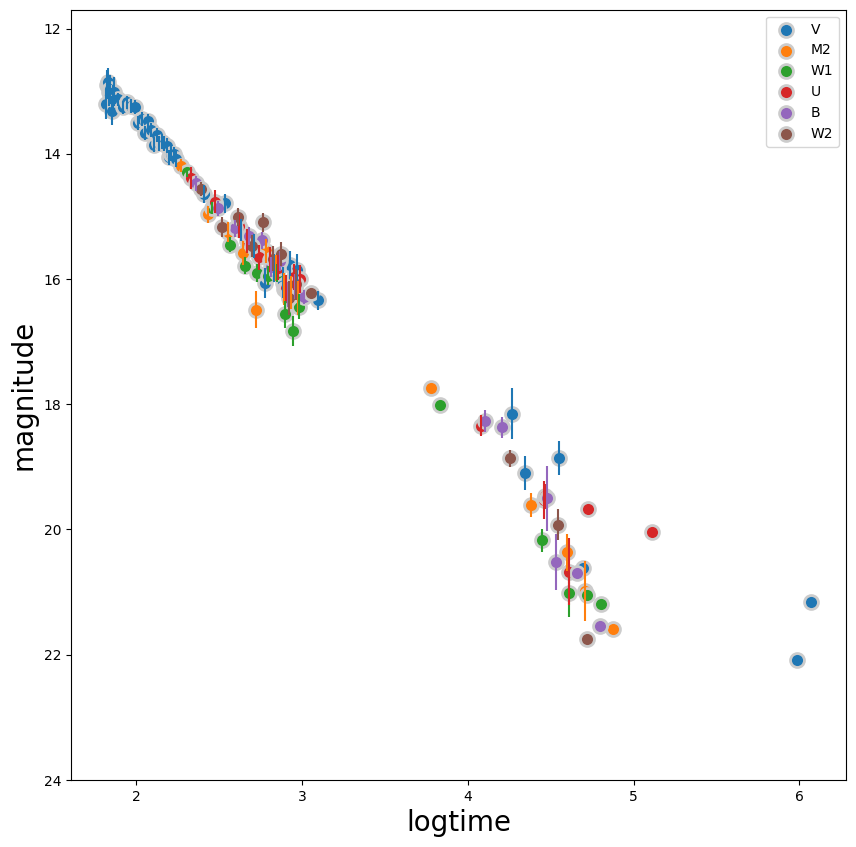

In [52]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("logtime", fontsize=20);

Figure 2:
Plot of magnitude vs logtime to study the prompt and early afterglow emission

Drop the upper limit column

In [53]:
grbAG_noupper = grbAG[grbAG.upperlimit==0]
grbAG_noupper.tail()

,filter,time,mag,magerr,upperlimit,logtime
103,V,35638,18.860000,0.27,0,4.551913
104,M2,39683,20.369034,0.30,0,4.598604
105,W1,40585,21.017147,0.39,0,4.608366
106,U,41040,20.674538,0.54,0,4.613207
109,M2,51257,20.989034,0.48,0,4.709753


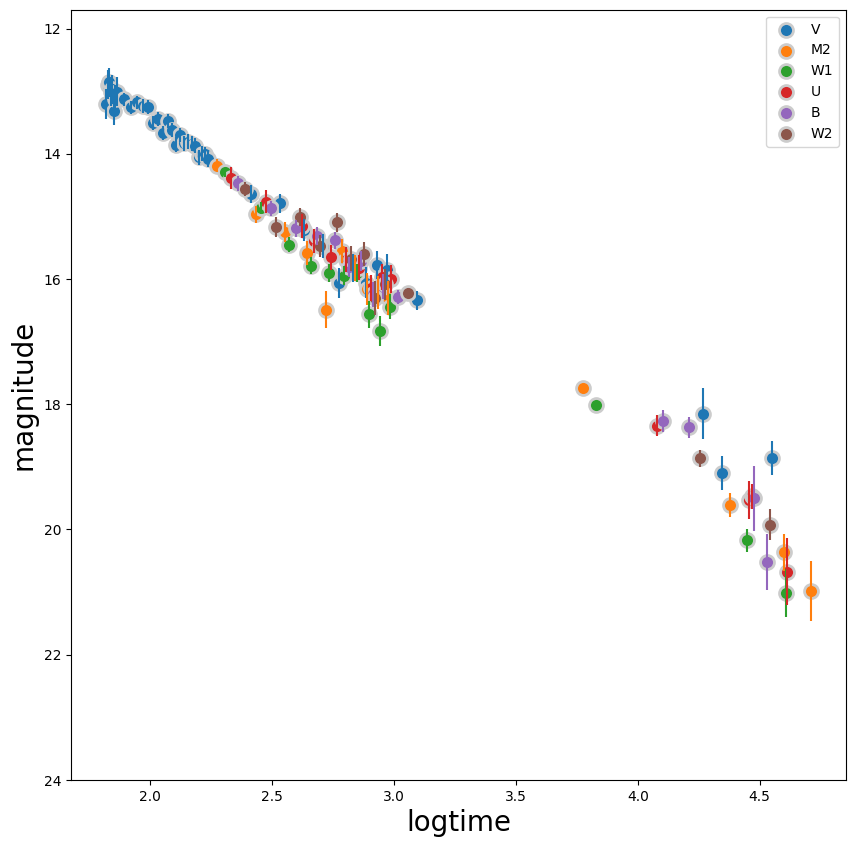

In [54]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG_noupper["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
                grbAG_noupper.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG_noupper.loc[grbAG_noupper["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG_noupper["filter"].unique():
    pl.scatter(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
               grbAG_noupper.loc[grbAG_noupper["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG_noupper.mag.isna().sum()
for i in grbAG_noupper[grbAG_noupper.upperlimit == 1].index:
    pl.arrow(grbAG_noupper.loc[i].logtime,
             grbAG_noupper.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("logtime", fontsize=20);

Figure 3:
Same data plotted by dropping the missing data for magerr and dropping upperlimit =1

In [55]:
#x axis must be 2D matrix (logtime-first column) multiply by intercept (second column)
x = grbAG["logtime"].values # 1D array
X =np.c_[np.ones(len(x)),x] # 2D array


The best linear fit to data is given by the equation:  

$(X^T \cdot X)^{-1} \cdot X^T \cdot \vec{y}$

In [56]:
y = grbAG["mag"].values
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([8.78399716, 2.44193753])

In [57]:
print("the best fit parameters from the normal equation are intercept:{0:.2f} slope:{1:.2f}".format(*theta_best))

the best fit parameters from the normal equation are intercept:8.78 slope:2.44


we can use sklearn to solve equation for us

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones(len(x)), x]
lr.fit(X, y)
lr.coef_, lr.intercept_
#internal paramters of the model are called with an underscore

(array([0.        , 2.44193753]), 8.783997158154104)

In [59]:
print("The best fir parameter, linear slope is: ", lr.coef_[1], "and the intercept is:", lr.intercept_)

The best fir parameter, linear slope is:  2.4419375279666333 and the intercept is: 8.783997158154104


Optimization

In [60]:
from scipy.optimize import minimize # minimize the objective function
def line(x,slope,intercept):
  f = slope*x +intercept
  return f

def l1(args,x,y):
  slope, intercept = args
  return np.sum(np.absolute(y-line(x,slope,intercept)))
  '''
  L1 function: returns value of L1 for given arguments and data for a line model
  arg: slope and intercept
  x: independent variable (array)
  y: dependent variable (array)
  returns  L1 sum of difference between the absolute of prediction from the true data.
  '''




In [61]:
def l2(args,x,y):
  '''
  L2 function: returns value of L2 for given arguments and data for a line model
  arg: slope and intercept
  x: independent variable (array)
  y: dependent variable (array)
  returns  L2 sum of difference between prediction and data squared
  '''
  slopel2, interceptl2 = args
  return np.sum((y-line(x,slopel2,interceptl2))**2)


In [62]:
def chi_square(args,x,y):
  '''
  chi squared function: returns value of chi squared for given arguments and data for a line model
  arg: slope and intercept
  x: independent variable (array)
  y: dependent variable (array)
  returns  chi squared sum of difference between the prediction from the true data divided by standard deviation.
  '''
  slope, intercept = args
  return np.sum(((y-line(x,slope,intercept))**2)/grbAG.magerr)

 everytime args will be changed in the gradient descent

In [63]:
initial_guess = (10,1)
solution  = minimize(l1, initial_guess, args=(x, y))
slope, intercept = solution.x
print(solution)
print("best fit parameters from the minimization of L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 37.09363885511023
        x: [ 2.641e+00  8.226e+00]
      nit: 15
      jac: [ 4.929e+00  6.727e-01]
 hess_inv: [[ 1.121e-04 -3.417e-04]
            [-3.417e-04  1.042e-03]]
     nfev: 243
     njev: 77
best fit parameters from the minimization of L1: slope 2.64, intercept 8.23


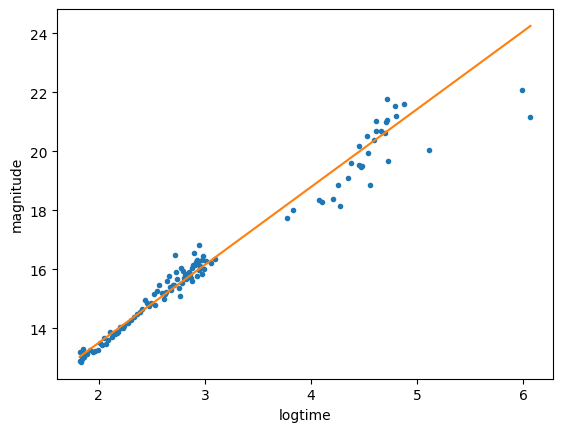

In [64]:

plot(x,y,".")
plt.plot(x,line(x,2.64,8.23))
pl.ylabel("magnitude")
pl.xlabel("logtime");

Figure 4: Applying L1 fit to the data to minimize the loss and optimize the parameters of the model.

In [65]:
initial_guess = (10,1)
solutionl2  = minimize(l2, initial_guess, args=(x, y))
slopel2, interceptl2 = solutionl2.x
print(solutionl2)
print("best fit parameters from the minimization of L2: " +
       "slope {:.2f}, intercept {:.2f}".format(*solutionl2.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 28.262979624951452
        x: [ 2.442e+00  8.784e+00]
      nit: 6
      jac: [-4.768e-07 -2.384e-07]
 hess_inv: [[ 4.182e-03 -1.277e-02]
            [-1.277e-02  4.319e-02]]
     nfev: 24
     njev: 8
best fit parameters from the minimization of L2: slope 2.44, intercept 8.78


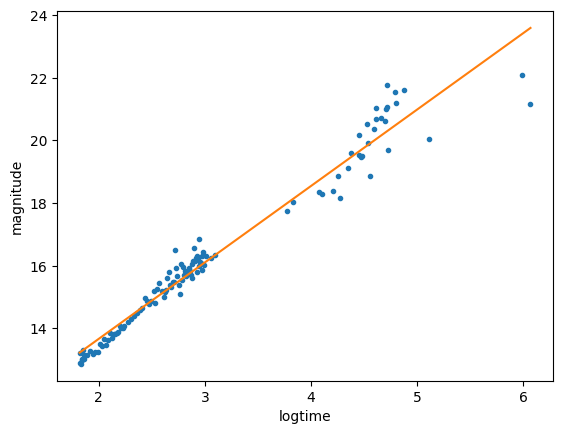

In [66]:
plot(x,y,".")
plt.plot(x,line(x,2.44,8.78))
pl.ylabel("magnitude")
pl.xlabel("logtime");

Figure 5: Applying L2 fit to the data to minimize the loss and optimize the parameters of the model.

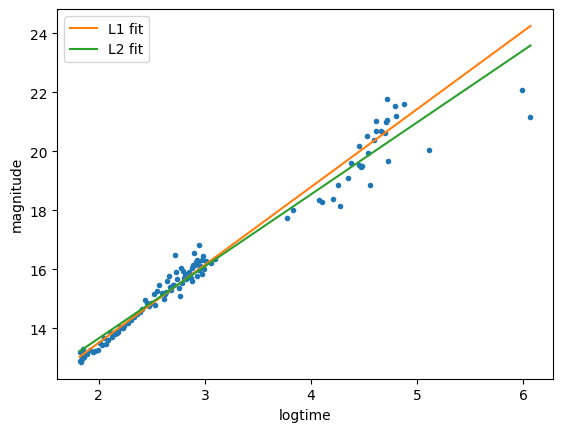

In [67]:
plot(x,y,".")
plt.plot(x,line(x,2.64,8.23), label="L1 fit")
plt.plot(x,line(x,2.44,8.78), label="L2 fit")
plt.legend()
pl.ylabel("magnitude")
pl.xlabel("logtime")

plt.show()

Figure 6: Plot for comparison between L1 and L2 fit.

In [68]:
initial_guess = (5,1)
solutionchi  = minimize(l2, initial_guess, args=(x, y))
slopechi, interceptchi = solutionchi.x
print(solutionchi)
print("best fit parameters from the minimization of chi square: " +
       "slope {:.2f}, intercept {:.2f}".format(*solutionchi.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 28.262979624951456
        x: [ 2.442e+00  8.784e+00]
      nit: 5
      jac: [ 9.537e-07  4.768e-07]
 hess_inv: [[ 4.182e-03 -1.277e-02]
            [-1.277e-02  4.319e-02]]
     nfev: 21
     njev: 7
best fit parameters from the minimization of chi square: slope 2.44, intercept 8.78


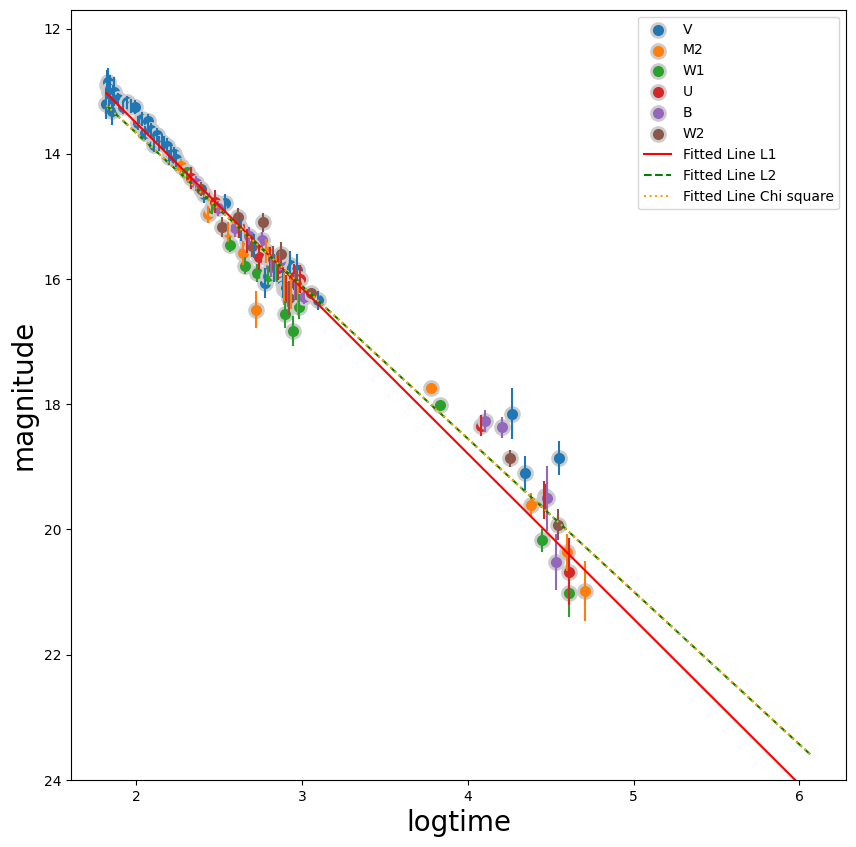

In [69]:
#create a figure container and an axis object inside of it


ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG_noupper["filter"].unique(): #set for unique filters
    pl.errorbar(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
                grbAG_noupper.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG_noupper.loc[grbAG_noupper["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG_noupper["filter"].unique():
    pl.scatter(grbAG_noupper.loc[grbAG_noupper["filter"] == f, "logtime"],
               grbAG_noupper.loc[grbAG_noupper["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')

plt.plot()

# plot the upperlimits as arrows
nuplim = grbAG_noupper.mag.isna().sum()
for i in grbAG_noupper[grbAG_noupper.upperlimit == 1].index:
    pl.arrow(grbAG_noupper.loc[i].logtime,
             grbAG_noupper.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')
#minimize L1
plt.plot(x, line(x, slope, intercept), color='red', label="Fitted Line L1")
plt.plot(x, line(x, slopel2, interceptl2), color='green', label="Fitted Line L2", linestyle="--")
plt.plot(x, line(x, slopechi, interceptchi), color='orange', label="Fitted Line Chi square",linestyle=":")


# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("logtime", fontsize=20);

Figure 7: Applying different fits, L1, L2, nad chi square to the data to ee which one is the best fit.

In [70]:
from sklearn.model_selection import train_test_split

def line(x, intercept, slope):
    return slope * x + intercept

def l1(args,x,y):
  a,b = args
  return np.sum(np.absolute(y-line(x,a,b)))

def l2(args,x,y):
  a,b = args
  return np.sum((y-line(x,a,b))**2)

def Rsquare(args, x, y):
  """
  Calculate the R-squared (coefficient of determination) for a regression model.

  Parameters:
  y_true: 1D array-like, true observed values.
  y_pred: 1D array-like, predicted values.

  Returns:
  R-squared value.
  """
  a,b = args
  y_pred = line(x, a,b)
  residual_ss = np.sum((y-y_pred)**2)
  total_ss = np.sum((y-np.mean(y))**2)
  r_square = 1 - (residual_ss/total_ss)
  return r_square



In [71]:
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.25, random_state=42)

initialGuess = (10, 1)

l1solution_goodsplit = minimize(l1, initialGuess,
	args=(x_train, y_train))

l2solution_goodsplit = minimize(l2, initialGuess,
	args=(x_train, y_train))

print("best fit parameters from the minimization of the L1: " +
       " intercept {:.2f}, slope {:.2f}".format(*l1solution_goodsplit.x))

print("R square on training set: ", Rsquare(l1solution_goodsplit.x, x_train, y_train))
print("R square on test set: ", Rsquare(l1solution_goodsplit.x, x_test, y_test))


print("best fit parameters from the minimization of the L2: " +
       " intercept {:.2f}, slope {:.2f}".format(*l2solution_goodsplit.x))

print("R square on training set: ", Rsquare(l2solution_goodsplit.x, x_train, y_train))
print("R square on test set: ", Rsquare(l2solution_goodsplit.x, x_test, y_test))

best fit parameters from the minimization of the L1:  intercept 8.03, slope 2.72
R square on training set:  0.9442589275567049
R square on test set:  0.9569360684802724
best fit parameters from the minimization of the L2:  intercept 8.75, slope 2.46
R square on training set:  0.9558182563506553
R square on test set:  0.9765425951300621


I could not figure out the reg.score test as it had some errors with the dimension of the data, however the slides had R square test, in which the test score value closer to 1 means a good fit. In this case both L1 and L2 scores are close to one which means both are good fits however by slightest decimal point difference L2 stands out to be better than L1. Another point to note is that not only test score for train but test data should also be close to 1 to consider it as a good fit.

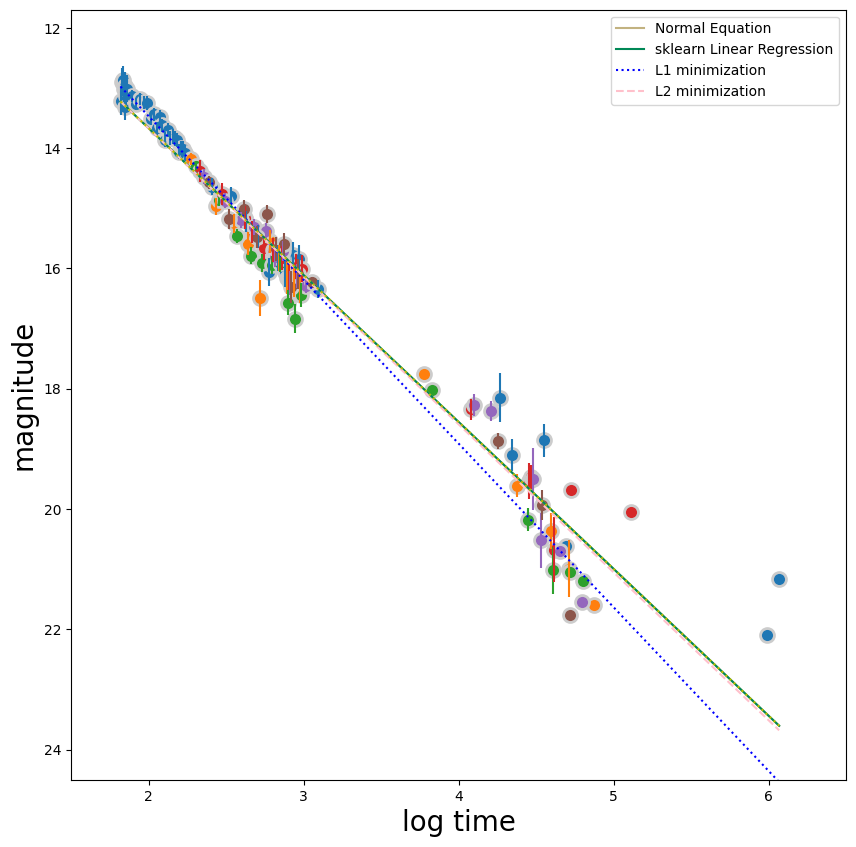

In [72]:
def plotline(pars, x, color='k', symbol='-', label='model',
             alpha=1, ax=ax):
    slope, intercept = pars
    y = line(intercept, slope, x)
    ax.plot(x, y, ls=symbol, c=color, label=label, alpha=alpha)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.intercept_,lr.coef_[1]), grbAG.logtime,
         color='#'+colors[0],
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best), grbAG.logtime,
         color='#'+colors[2], symbol='-',
         label="sklearn Linear Regression", ax=ax)
#minimize L1
plotline((l1solution_goodsplit.x), grbAG.logtime,
         symbol=':', color='blue',
         label="L1 minimization", ax=ax)

#minimize L2
plotline((l2solution_goodsplit.x), grbAG.logtime,
         symbol='--', color='pink',
         label="L2 minimization", ax=ax)

pl.legend()
# for linear regression
pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'y:',label="Linear regression")

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure 8 : Same as figure 7 but this time with sklearn linear regression model and minimizing L1 and L2.

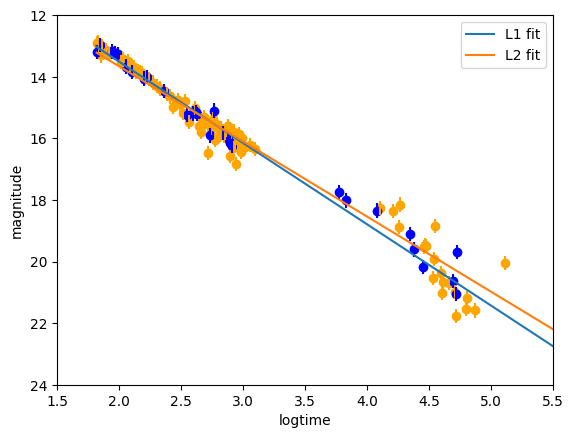

In [78]:
plt.scatter(x_train,y_train, color='orange')
plt.scatter(x_test,y_test, color='blue')
pl.errorbar(x_train,y_train, yerr=grbAG_noupper["magerr"][1], fmt='.', ms=0,
                color='orange', label=None)
pl.errorbar(x_test,y_test, yerr=grbAG_noupper["magerr"][1], fmt='.', ms=0,
                color='blue', label=None)
plt.plot(x,line(x,8.23,2.64), label="L1 fit")
plt.plot(x,line(x,8.78,2.44), label="L2 fit")
plt.legend()
pl.ylabel("magnitude")
pl.xlabel("logtime")
plt.xlim(1.5,5.5)
plt.ylim(24,12)
plt.show()

Figure 9 : Using the training and test set, fitting L1 and L2